In [686]:
#imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

#stats-model api import
import statsmodels.api as sm


In [687]:
"""
Two methods to read data, one from an .xlsx sheet and one way from a .csv file the first column of data must be the 
dependent varible, the rest of the columns should be the independent variable(s)
"""

#reading an excel sheet containing the data
data = pd.read_excel('/Users/aditya/ctc-hackathon-2022/Paraguay .xlsx')

#reading a csv file containing data, get rid of first "#" and replace second "#" with directory path to csv file
#data = pd.read_csv('#')

In [688]:
#displaying the first 5 rows, allow user to see if data was correctly displayed
data.head()


,Gini Coefficient,Clean Water Access (% of population),Healthcare Spending per Capita ($),Urbanization of Population (% of population),Homicide Rate (per 100 000 people)
0,54.6,49.51,100,55.33,18.69
1,54.6,50.52,88,55.97,24.21
2,57.3,51.52,62,56.60,24.80
3,54.9,52.41,67,56.98,22.81
4,52.3,53.27,83,57.31,21.10


In [689]:
#row0 is a list of the headers, e.g ['Suicide rate','Electricity Access', etc..]
row0 = list(data)

#x is the independent variable data other than than first column, which is the dependent variable. 
x=data.drop([row0[0]],axis=1).values

#y is equal to the dependent data, column 0 
y=data[row0[0]].values

In [690]:
"""
trains the model using datasets, test_size set to a high value 
since data is limited; model trains using more input data
"""


#test_size should be adjusted relative to the sample size, lower sample
#size requires a higher test_size input (0 - 1.0) 


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=0)

In [691]:
#create linear regression object

ml = LinearRegression()

#train the model using the training sets
ml.fit(x_train, y_train)

LinearRegression()

In [692]:
#make predictions using the testing set

y_pred = ml.predict(x_test)


Text(0.5, 1.0, 'Actual vs. Predicted')

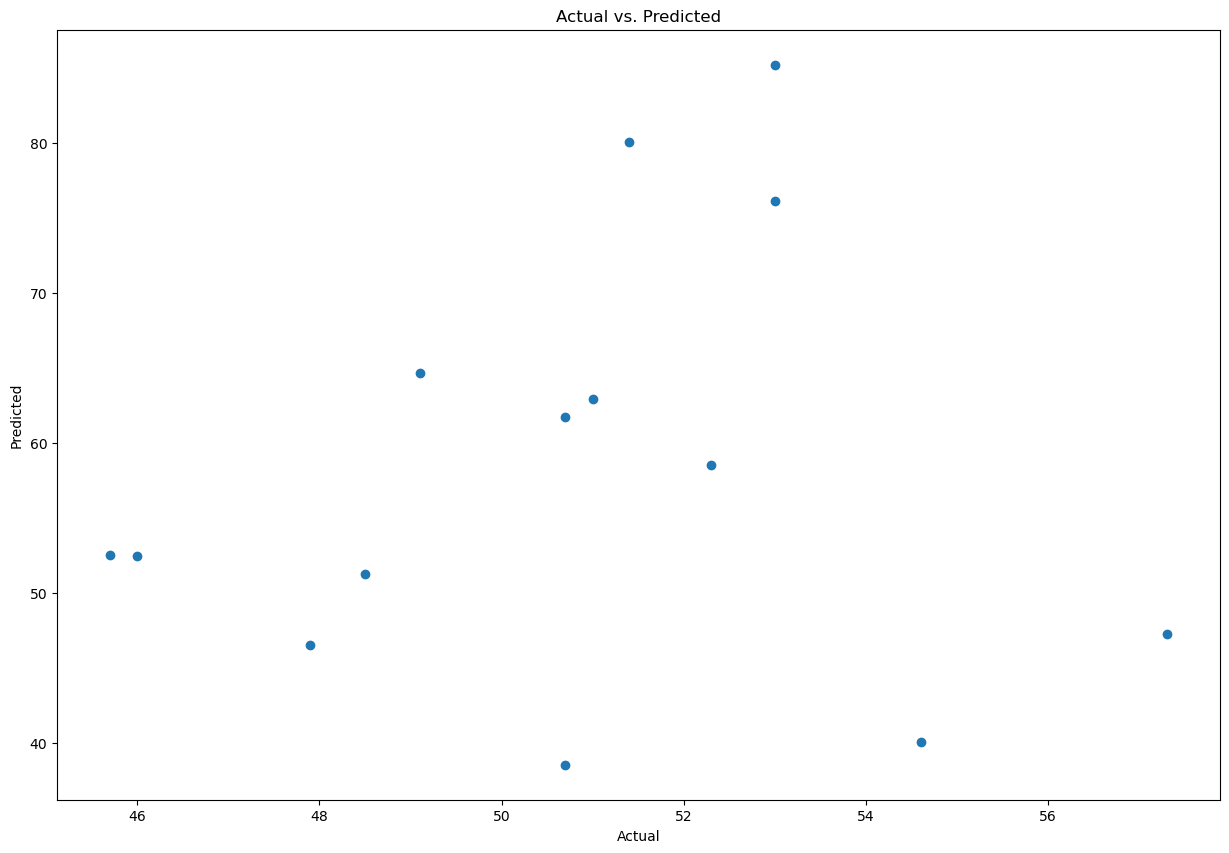

In [693]:
#plotting the data
#TOMORROW DISCUSS WHETHER TO DELETE THIS SECTION OR NOT 

plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [694]:
"""
Compares the predicted value from the machine learning model to the actual values,
ensuring that the sum of the residuals is minimal and outliers are made known. 
"""

pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:-1]

,Actual Value,Predicted Value,Difference
0,46.0,52.466707,-6.466707
1,54.6,40.090784,14.509216
2,45.7,52.539115,-6.839115
3,50.7,61.720606,-11.020606
4,51.0,62.914306,-11.914306
5,48.5,51.249907,-2.749907
6,53.0,85.217396,-32.217396
7,47.9,46.545109,1.354891
8,52.3,58.553671,-6.253671
9,57.3,47.268621,10.031379


In [695]:
"""
using the statsmodels api, we can get important summary statistics such as 
the coefficients for our equations and our p-values from the analysis
"""

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     16.10
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           2.64e-05
Time:                        00:44:46   Log-Likelihood:                -34.590
No. Observations:                  20   AIC:                             79.18
Df Residuals:                      15   BIC:                             84.16
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.5429    105.278      0.746      0.4

In [696]:
"""
logic developed to determine p values that are < 0.05, which indicate a statiscally significant 
relationship between our dependent variable and any of our independent variables
"""

significant_p = []
for i in range(1, len(row0)):
    if est2.pvalues[i] < 0.05:
        significant_p.append(row0[i])
        print('sig p')
        

#if len(significant_p)==0:
#    print('No significant relationships found.')
            

significant_p

[]